### <center> Experiment 2 - Unsteady State Heat Transfer

### **Objective**:
* To study unsteady state heat transfer using the lumped capacitance method for finite geometric shape.


### **Aim**:
* To determine internal thermal resistance of the body by calculating Biot number for the solid cylinders.
* Draw a graph between time, t (s) verses $\ln \left[\frac{T-T_{\infty}}{T_{i}-T_{\infty}}\right]$ and from the slope calculate Bi and h and compare with average values.

### **Theory**:

In many situations where steady state is not prevalent, analysis becomes much more difficult. In these situations where unsteady (transient) heat flow causes temperature and other variables to change with time. However, in some unsteady situations, for which a certain criterion is met, the use of the lumped capacitance theory greatly simplifies the analysis (also known as lumped-heat-capacity method). The criterion is based on the assumption that temperature gradients within a solid are negligible compared to the temperature gradients between the solid and the surrounding fluid. Whether this assumption is valid or not depends on the value of Biot number (Bi).
To understand the lumped heat capacity theory we consider a hot metal block that is submerged in water. The basic concept of this theory is that the temperature within the solid block is assumed to be spatially uniform at any instant throughout the unsteady heating process. This implies that the temperature gradient within the solid is negligible compared to the gradient across the solid-fluid interface.
Assuming a system with negligible internal resistance, i.e., a system that has infinite thermal conductivity (Ideal Case). This assumption is justified when external thermal resistance between the surface of the system and surrounding medium is very large as compared to the internal thermal resistance.

### **Procedure**:

1. Fill the water bath with water up to the desired level.
2. Set the desired bath temperature with the help of DTC ($T_{\infty}$).
3. Start the stirrer and the heater.
4. Wait till desired bath temperature has been achieved.
5. Dip the Test cylinder into the hot water bath and start collecting the data of time
vs. temperature preferably after every 10 s.
6. Continue till steady state has been achieved (i.e., variation in temperature with
time is negligible)
7. Repeat the above steps for another bath temperature.
8. Take one set of readings with the agitator switched off.
9. Stop the electric supply to heater and motor.

### **Experimental Setup**:

1. Entire setup <img src="exp_uss.png" width=400 height=500 />

### **Formulae**:

1. $$\alpha=\frac{\boldsymbol{k}}{\rho C_{P}}$$

2. $$\quad V=\pi^{*} R_{o}^{2} * L $$

3. $$\quad A=2 * \pi * R_{o} * L$$

4. $$F_{o}=\frac{\alpha t}{(V / A)^{2}}$$

5. $$ T_{e}=\frac{T-T_{\infty}}{T_{i}-T_{\infty}}$$

6. $$B_{i}=\frac{\ln \left(T_{e}\right)}{\left(-F_{o}\right)}$$

7. $$Q_{i}=h^{*} A^{*}\left(T_{\infty}-T_{i}\right) * e^{\left(-B_{i}{ }^{*} F_{o}\right)}$$

### **Observations & Calculation**:

In [200]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [89]:
#Given data
ro = 0.019
l = 0.14
#brass
rho_b = 8522          #kg/m3
cp_b = 385            #J/Kg K
k_b = 110.7           #W/m K
alpha_b = k_b/(rho_b*cp_b)
#stainless steel
rho_ss = 7817
cp_ss = 461
k_ss = 16.3
alpha_ss = k_ss/(rho_ss*cp_ss)

A = 2*np.pi*ro*l
V = np.pi*(ro**2)*l


In [161]:
#For Brass @ 50 degrees with agitator
t_b1 = np.array([0,20,30,40,50,60,70,80,90,100,110,120])
T_brass_1 = np.array([24.1,30.6,42.2,46.6,47.7,48.3,48.5,48.7,49,49.1,49.1,49.1])
Ti_b1 = T_brass_1[0]
T_inf_b1 = 50
F_b1 = (alpha_b*t_b1)/(V/A)**2       #Fourier number
Te_b1 = (T_brass_1 - T_inf_b1) / (Ti_b1 - T_inf_b1)
Bi_b1 = np.log(Te_b1[1:])/(-1*F_b1[1:])
h_b1 = 2*k_b*Bi_b1/ro
Qi_b1 = h_b1*A*(T_inf_b1 - Ti_b1)*np.exp(-1*Bi_b1*F_b1[1:])

In [162]:
br_50_a = pd.DataFrame({'Time (t)': t_b1[1:],
                   'Te': Te_b1[1:],
                  'Fo': F_b1[1:],
                  'Bi':Bi_b1,
                  'h':h_b1,
                  'Qi':Qi_b1})
print(br_50_a)

    Time (t)        Te         Fo        Bi            h          Qi
0         20  0.749035   7.477013  0.038648   450.348251  146.019789
1         30  0.301158  11.215520  0.107005  1246.892482  162.549304
2         40  0.131274  14.954026  0.135781  1582.201980   89.908830
3         50  0.088803  18.692533  0.129535  1509.421505   58.022959
4         60  0.065637  22.431040  0.121422  1414.882212   40.200431
5         70  0.057915  26.169546  0.108859  1268.488137   31.800883
6         80  0.050193  29.908053  0.100036  1165.681382   25.327056
7         90  0.038610  33.646559  0.096718  1127.024431   18.836267
8        100  0.034749  37.385066  0.089865  1047.162033   15.751354
9        110  0.034749  41.123573  0.081695   951.965485   14.319413
10       120  0.034749  44.862079  0.074887   872.635028   13.126129


In [167]:
#For Brass @ 60 degrees with agitator
t_b2 = np.linspace(0,110,12)
T_brass_2 = np.array([31,41.5,50,54.5,56.8,57.7,58.4,58.7,58.8,59,59,59])
Ti_b2 = T_brass_2[0]
T_inf_b2 = 60
F_b2 = (alpha_b*t_b2)/(V/A)**2                         #Fourier number
Te_b2 = (T_brass_2 - T_inf_b2) / (Ti_b2 - T_inf_b2)
Bi_b2 = np.log(Te_b2[1:])/(-1*F_b2[1:])                 #Biot number
h_b2 = 2*k_b*Bi_b2/ro
Qi_b2 = h_b2*A*(T_inf_b2 - Ti_b2)*np.exp(-1*Bi_b2*F_b2[1:])

In [168]:
br_60_a = pd.DataFrame({'Time (t)': t_b2[1:],
                   'Te': Te_b2[1:],
                  'Fo': F_b2[1:],
                  'Bi':Bi_b2,
                  'h':h_b2,
                  'Qi':Qi_b2})
print(br_60_a)

    Time (t)        Te         Fo        Bi            h          Qi
0       10.0  0.637931   3.738507  0.120242  1401.134442  433.224533
1       20.0  0.344828   7.477013  0.142398  1659.309894  277.324991
2       30.0  0.189655  11.215520  0.148236  1727.343596  158.782607
3       40.0  0.110345  14.954026  0.147395  1717.536751   91.858113
4       50.0  0.079310  18.692533  0.135583  1579.896883   60.732070
5       60.0  0.055172  22.431040  0.129164  1505.105392   40.248379
6       70.0  0.044828  26.169546  0.118647  1382.546850   30.038948
7       80.0  0.041379  29.908053  0.106492  1240.914349   24.887688
8       90.0  0.034483  33.646559  0.100078  1166.177419   19.490641
9      100.0  0.034483  37.385066  0.090071  1049.559677   17.541577
10     110.0  0.034483  41.123573  0.081882   954.145161   15.946888


In [170]:
#For Brass @ 70 degrees without agitator
t_b3 = np.linspace(0,220,23)
T_brass_3 = np.array([31.1,40.2,47,52.3,55.7,58.2,60.7,62.2,63.4,64.2,65.2,65.7,66.2,66.6,66.8,67,67.2,67.3,67.5,67.7,
                     67.8,68,68])
Ti_b3 = T_brass_3[0]
T_inf_b3 = 70
F_b3 = (alpha_b*t_b3)/(V/A)**2                     #Fourier number
Te_b3 = (T_brass_3 - T_inf_b3) / (Ti_b3 - T_inf_b3)
Bi_b3 = np.log(Te_b3[1:])/(-1*F_b3[1:])             #Biot number
h_b3 = 2*k_b*Bi_b3/ro
Qi_b3 = h_b3*A*(T_inf_b3 - Ti_b3)*np.exp(-1*Bi_b3*F_b3[1:])

In [171]:
br_70_wa = pd.DataFrame({'Time (t)': t_b3[1:],
                   'Te': Te_b3[1:],
                  'Fo': F_b3[1:],
                  'Bi':Bi_b3,
                  'h':h_b3,
                  'Qi':Qi_b3})
print(br_70_wa)

    Time (t)        Te         Fo        Bi           h          Qi
0       10.0  0.766067   3.738507  0.071281  830.615497  413.692644
1       20.0  0.591260   7.477013  0.070282  818.971178  314.816843
2       30.0  0.455013  11.215520  0.070209  818.118761  242.019926
3       40.0  0.367609  14.954026  0.066921  779.802886  186.372736
4       50.0  0.303342  18.692533  0.063817  743.631839  146.656558
5       60.0  0.239075  22.431040  0.063795  743.375310  115.545380
6       70.0  0.200514  26.169546  0.061402  715.498466   93.274905
7       80.0  0.169666  29.908053  0.059313  691.147966   76.238874
8       90.0  0.149100  33.646559  0.056563  659.102950   63.891451
9      100.0  0.123393  37.385066  0.055968  652.177901   52.320131
10     110.0  0.110540  41.123573  0.053555  624.058470   44.849256
11     120.0  0.097686  44.862079  0.051848  604.161514   38.370562
12     130.0  0.087404  48.600586  0.050148  584.355364   33.206068
13     140.0  0.082262  52.339092  0.047724  556

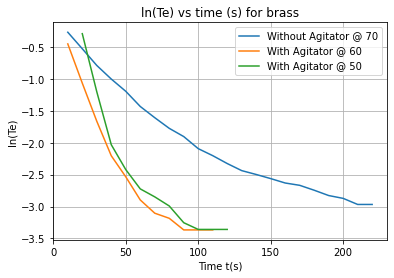

In [172]:
#graph for brass
plt.plot(t_b3[1:],np.log(Te_b3[1:]),label="Without Agitator @ 70")
plt.plot(t_b2[1:],np.log(Te_b2[1:]),label="With Agitator @ 60")
plt.plot(t_b1[1:],np.log(Te_b1[1:]),label="With Agitator @ 50")
plt.title("ln(Te) vs time (s) for brass")
plt.xlabel("Time t(s)")
plt.ylabel("ln(Te)")
plt.grid()
plt.legend()
plt.show()

In [173]:
#For Stainless steel @ 50 degrees with agitator
t_1 = np.linspace(0,100,11)
T_ss_1 = np.array([24.1,25,35.6,41.7,44.8,48.2,48.8,49.1,49.2,49.3,49.3])

Ti_1 = T_ss_1[0]
T_inf_1 = 50
F_1 = (alpha_ss*t_1)/(V/A)**2                     #Fourier number
Te_1 = (T_ss_1 - T_inf_1) / (Ti_1 - T_inf_1)
Bi_1 = np.log(Te_1[1:])/(-1*F_1[1:])             #Biot number
h_1 = 2*k_ss*Bi_1/ro
Qi_1 = h_1*A*(T_inf_1 - Ti_1)*np.exp(-1*Bi_1*F_1[1:])

In [174]:
ss_50_a = pd.DataFrame({'Time (t)': t_1[1:],
                   'Te': Te_1[1:],
                  'Fo': F_1[1:],
                  'Bi':Bi_1,
                  'h':h_1,
                  'Qi':Qi_1})
print(ss_50_a)

   Time (t)        Te        Fo        Bi            h          Qi
0      10.0  0.965251  0.501186  0.070567   121.077831   50.590171
1      20.0  0.555985  1.002373  0.585625  1004.809355  241.828603
2      30.0  0.320463  1.503559  0.756862  1298.616337  180.144273
3      40.0  0.200772  2.004746  0.800892  1374.161497  119.427028
4      50.0  0.069498  2.505932  1.064058  1825.698713   54.924122
5      60.0  0.046332  3.007119  1.021550  1752.764196   35.153312
6      70.0  0.034749  3.508305  0.957614  1643.064550   24.714888
7      80.0  0.030888  4.009492  0.867289  1488.084599   19.896611
8      90.0  0.027027  4.510678  0.800527  1373.535058   16.069386
9     100.0  0.027027  5.011865  0.720474  1236.181552   14.462448


In [175]:
#For Stainless steel @ 60 degrees with agitator
t_2 = np.linspace(0,160,17)
T_ss_2 = np.array([30.2,30.8,36.8,42.6,47.7,50.5,53.1,54.7,56.1,56.9,57.5,58,58.2,58.4,58.5,58.5,58.5])

Ti_2 = T_ss_2[0]
T_inf_2 = 60
F_2 = (alpha_ss*t_2)/(V/A)**2                     #Fourier number
Te_2 = (T_ss_2 - T_inf_2) / (Ti_2 - T_inf_2)
Bi_2 = np.log(Te_2[1:])/(-1*F_2[1:])             #Biot number
h_2 = 2*k_ss*Bi_2/ro 
Qi_2 = h_2*A*(T_inf_2 - Ti_2)*np.exp(-1*Bi_2*F_2[1:])

In [176]:
ss_60_a = pd.DataFrame({'Time (t)': t_2[1:],
                   'Te': Te_2[1:],
                  'Fo': F_2[1:],
                  'Bi':Bi_2,
                  'h':h_2,
                  'Qi':Qi_2})
print(ss_60_a)

    Time (t)        Te        Fo        Bi           h          Qi
0       10.0  0.979866  0.501186  0.040583   69.631997   33.982334
1       20.0  0.778523  1.002373  0.249763  428.541465  166.166067
2       30.0  0.583893  1.503559  0.357843  613.983201  178.553037
3       40.0  0.412752  2.004746  0.441407  757.361681  155.693307
4       50.0  0.318792  2.505932  0.456204  782.750148  124.282010
5       60.0  0.231544  3.007119  0.486508  834.745053   96.264121
6       70.0  0.177852  3.508305  0.492204  844.518248   74.807719
7       80.0  0.130872  4.009492  0.507179  870.213131   56.722027
8       90.0  0.104027  4.510678  0.501722  860.849206   44.601584
9      100.0  0.083893  5.011865  0.494470  848.406702   35.449132
10     110.0  0.067114  5.513051  0.489994  840.726269   28.102575
11     120.0  0.060403  6.014238  0.466680  800.723830   24.088889
12     130.0  0.053691  6.515424  0.448859  770.146992   20.594683
13     140.0  0.050336  7.016611  0.425995  730.918259   18.32

In [177]:
#For Stainless steel @ 60 degrees without agitator
t_3 = np.linspace(0,320,33)
T_ss_3 = np.array([30.8,32.5,37.4,42,46.2,49.1,51.9,54,55.9,57.9,59.2,60.5,61.7,62.5,63.3,63.9,64.5,65,65.3,65.7,66,
                  66.2,66.5,66.7,66.9,67.1,67.2,67.3,67.5,67.6,67.6,67.7,67.7])
Ti_3 = T_ss_3[0]
T_inf_3 = 70
F_3 = (alpha_ss*t_3)/(V/A)**2                     #Fourier number
Te_3 = (T_ss_3 - T_inf_3) / (Ti_3 - T_inf_3)
Bi_3 = np.log(Te_3[1:])/(-1*F_3[1:])             #Biot number
h_3 = 2*k_ss*Bi_3/ro
Qi_3 = h_3*A*(T_inf_3 - Ti_3)*np.exp(-1*Bi_3*F_3[1:])


In [178]:
ss_60_wa = pd.DataFrame({'Time (t)': t_3[1:],
                   'Te': Te_3[1:],
                  'Fo': F_3[1:],
                  'Bi':Bi_3,
                  'h':h_3,
                  'Qi':Qi_3})
print(ss_60_wa)

    Time (t)        Te         Fo        Bi           h          Qi
0       10.0  0.956633   0.501186  0.088462  151.781670   95.128818
1       20.0  0.831633   1.002373  0.183928  315.581727  171.945555
2       30.0  0.714286   1.503559  0.223784  383.965870  179.685139
3       40.0  0.607143   2.004746  0.248905  427.068469  169.877543
4       50.0  0.533163   2.505932  0.250975  430.621078  150.419131
5       60.0  0.461735   3.007119  0.256978  440.920944  133.383100
6       70.0  0.408163   3.508305  0.255419  438.245309  117.192215
7       80.0  0.359694   4.009492  0.255020  437.561196  103.114423
8       90.0  0.308673   4.510678  0.260597  447.130362   90.423442
9      100.0  0.275510   5.011865  0.257216  441.328083   79.661196
10     110.0  0.242347   5.513051  0.257096  441.123073   70.039798
11     120.0  0.211735   6.014238  0.258124  442.887038   61.437363
12     130.0  0.191327   6.515424  0.253824  435.509245   54.590886
13     140.0  0.170918   7.016611  0.251770  431

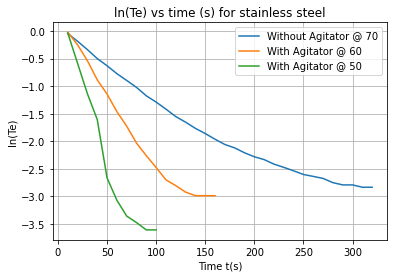

In [179]:
#Graph for stainless steel
plt.plot(t_3[1:],np.log(Te_3[1:]),label="Without Agitator @ 70")
plt.plot(t_2[1:],np.log(Te_2[1:]),label="With Agitator @ 60")
plt.plot(t_1[1:],np.log(Te_1[1:]),label="With Agitator @ 50")
plt.title("ln(Te) vs time (s) for stainless steel")
plt.xlabel("Time t(s)")
plt.ylabel("ln(Te)")
plt.grid()
plt.legend()
plt.show()

### **Graph**:

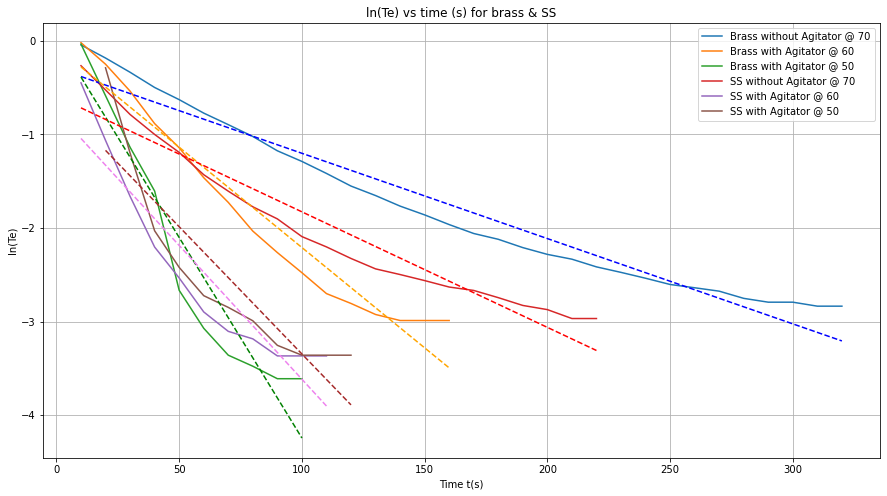

In [221]:
#Graph for stainless steel
plt.plot(t_3[1:],np.log(Te_3[1:]),label="Brass without Agitator @ 70")
plt.plot(t_2[1:],np.log(Te_2[1:]),label="Brass with Agitator @ 60")
plt.plot(t_1[1:],np.log(Te_1[1:]),label="Brass with Agitator @ 50")
plt.plot(t_b3[1:],np.log(Te_b3[1:]),label="SS without Agitator @ 70")
plt.plot(t_b2[1:],np.log(Te_b2[1:]),label="SS with Agitator @ 60")
plt.plot(t_b1[1:],np.log(Te_b1[1:]),label="SS with Agitator @ 50")
plt.title("ln(Te) vs time (s) for brass & SS")
plt.xlabel("Time t(s)")
plt.ylabel("ln(Te)")
plt.grid()
plt.legend()
plt.rcParams['figure.figsize'] = [15, 8]
#trendlines
slope1, intercept1 = np.polyfit(t_3[1:],np.log(Te_3[1:]), 1)
plt.plot(t_3[1:], t_3[1:]*slope1 + intercept1, '--',color="blue")

slope2, intercept2 = np.polyfit(t_2[1:],np.log(Te_2[1:]), 1)
plt.plot(t_2[1:], t_2[1:]*slope2 + intercept2, '--',color="orange")

slope3, intercept3 = np.polyfit(t_1[1:],np.log(Te_1[1:]), 1)
plt.plot(t_1[1:], t_1[1:]*slope3 + intercept3, '--',color="green")

slope4, intercept4 = np.polyfit(t_b3[1:],np.log(Te_b3[1:]), 1)
plt.plot(t_b3[1:], t_b3[1:]*slope4 + intercept4, '--',color="red")

slope5, intercept5 = np.polyfit(t_b2[1:],np.log(Te_b2[1:]), 1)
plt.plot(t_b2[1:], t_b2[1:]*slope5 + intercept5, '--',color="violet")

slope6, intercept6 = np.polyfit(t_b1[1:],np.log(Te_b1[1:]), 1)
plt.plot(t_b1[1:], t_b1[1:]*slope6 + intercept6, '--',color="brown")

$$ Slope = -\frac{h A}{\rho C_{P} V}$$

In [234]:
#BRASS
h1_b = -1*slope1*rho_b*cp_b*V/A
h2_b = -1*slope2*rho_b*cp_b*V/A
h3_b = -1*slope3*rho_b*cp_b*V/A
Bi_1 = h1_b*V/(A*k_b)
Bi_2 = h2_b*V/(A*k_b)
Bi_3 = h3_b*V/(A*k_b)
hb_avg = (h1_b+h2_b+h3_b)/3
print("The avg heat transfer coefficient for brass is {} W/m2 C ".format(hb_avg))
print("The biot numbers for 50, 60 and 70 degrees (no agitator) are {}, {},{} resp.".format(Bi_1,Bi_2,Bi_3))

The avg heat transfer coefficient for brass is 762.6749572598286 W/m2 C 
The biot numbers for 50, 60 and 70 degrees (no agitator) are 0.02437870456777043, 0.05734089510633207,0.11463303159875307 resp.


In [235]:
#STAINLESS STEEL
h1_s = -1*slope1*rho_b*cp_ss*V/A
h2_s = -1*slope2*rho_b*cp_ss*V/A
h3_s = -1*slope3*rho_b*cp_ss*V/A
Bi_1s = h1_s*V/(A*k_ss)
Bi_2s = h2_s*V/(A*k_ss)
Bi_3s = h3_s*V/(A*k_ss)
hs_avg = (h1_s+h2_s+h3_s)/3
print("The avg heat transfer coefficient for stainless steel is {} W/m2 C ".format(hs_avg))
print("The biot numbers for 50, 60 and 70 degrees (no agitator) are {}, {},{} resp.".format(Bi_1s,Bi_2s,Bi_3s))

The avg heat transfer coefficient for stainless steel is 913.2289747968338 W/m2 C 
The biot numbers for 50, 60 and 70 degrees (no agitator) are 0.19824892304926428, 0.4662992108505957,0.9322019140577938 resp.


### **Inferences**:

This experiment can be concluded by:
1. The average heat transfer coefficient of brass is 762.67 $ W/m^{2}C$ and the biot number varies from 0.02 to 0.11

2. The average heat transfer coefficient of stainless steel is 913.22 $ W/m^{2}C$ and the biot number varies from 0.198 to 0.93

3. The biot number of stainless steel is higher than that of brass which implies the rate of conductive heat transfer is greater in brass compared to convective heat transfer.

4. In absence of agitator the process takes longer time to attain steasy state.

### **Recommendations**:

1. Better insulation for the equipment.
2. Heater with higher heating value to attain quick uniform bath temperature.

### **Industrial Applications**:

1. Application of unsteady state heat transfer equations (USHTE) to determine temperature profile inside of the
product (during thermal processing) is of great importance to ensure safety and to process optimisation.

2. High Velocity Oxygen Fuel (HVOF) process involves the use of exhausted flame gas from a combustor to accelerate the injected coating particles to very high velocity (can be exceeding 1500 m/s well into the supersonic range).  The high energy impact of the high velocity particles will be enough to coat the material onto the surface and the completely melting (phase transition) of the particles is not required.   Therefore, it usually can provide a thicker and more uniform coating compared to other thermal process.